In [42]:
# Importing some useful libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder



In [23]:
# Importing the data and having a quick look

df = pd.read_csv("M1_final.csv")
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [24]:
# Let's do some exploration and maybe we can come up with ideas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [25]:
# Let's do some cleaning

# Removed the two null entries of that 'Wind' column gave us
# There could be a better way to keep more data by filling the mediant or some other value
# but ain't nobody got time for that


df.dropna(inplace=True)
df["Dew Point"] = df["Dew Point"].astype("int64")
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 28818 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28818 non-null  int64  
 1   DAY_OF_MONTH       28818 non-null  int64  
 2   DAY_OF_WEEK        28818 non-null  int64  
 3   OP_UNIQUE_CARRIER  28818 non-null  object 
 4   TAIL_NUM           28818 non-null  object 
 5   DEST               28818 non-null  object 
 6   DEP_DELAY          28818 non-null  int64  
 7   CRS_ELAPSED_TIME   28818 non-null  int64  
 8   DISTANCE           28818 non-null  int64  
 9   CRS_DEP_M          28818 non-null  int64  
 10  DEP_TIME_M         28818 non-null  int64  
 11  CRS_ARR_M          28818 non-null  int64  
 12  Temperature        28818 non-null  int64  
 13  Dew Point          28818 non-null  int64  
 14  Humidity           28818 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [26]:
# One the same note, let's see all the rest of the obj entries

df.select_dtypes(["object_"]).head()

,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,Wind,Condition
0,B6,N828JB,CHS,W,Fair / Windy
1,B6,N992JB,LAX,W,Fair / Windy
2,B6,N959JB,FLL,W,Fair / Windy
3,B6,N999JQ,MCO,W,Fair / Windy
4,DL,N880DN,ATL,W,Fair / Windy


In [27]:
# We also need to change any text based values to numeric so that the ML models can be used

le = LabelEncoder()

for x in df.select_dtypes(["object_"]).columns:
    df[x] = le.fit_transform(df[x]).astype("str")
    

df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,3,1405,10,-1,124,636,324,...,34,58,15,25,38,29.86,4,9,17,14
1,11,1,5,3,2074,28,-7,371,2475,340,...,34,58,15,25,38,29.86,4,9,17,15
2,11,1,5,3,1942,20,40,181,1069,301,...,34,58,15,25,38,29.86,4,9,17,22
3,11,1,5,3,2091,30,-2,168,944,345,...,34,58,15,25,38,29.86,4,9,17,12
4,11,1,5,4,1583,1,-4,139,760,360,...,32,58,15,24,35,29.91,4,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,3,270,38,2,57,150,1370,...,38,96,4,6,0,30.18,0,20,32,19
28816,1,31,5,1,11,4,2,75,187,1390,...,38,96,4,6,0,30.18,0,19,23,22
28817,1,31,5,2,975,55,283,392,2422,1125,...,38,96,4,6,0,30.18,0,19,23,21
28818,1,31,5,3,1935,58,5,224,1598,1417,...,38,96,4,6,0,30.18,0,19,23,13


In [20]:
# Checking the correlation and making a heatmap

corr_matrix = df.corr()
corr_matrix

/var/folders/3d/d8pgccgx0_v8fncxrs1jcvzm0000gn/T/ipykernel_40818/2355143037.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
MONTH,1.000000,-0.007274,0.029366,0.046421,-0.016010,-0.000106,0.001732,0.002537,-0.012333,0.135832,0.135151,0.012522,-0.034989,-0.050989,-0.085342,-0.006131,-0.019737,0.018347
DAY_OF_MONTH,-0.007274,1.000000,-0.029732,-0.036634,0.002779,-0.002746,0.001717,0.004407,0.008533,-0.132428,-0.040094,0.096218,-0.093178,-0.088981,0.016845,-0.003392,0.002210,-0.024065
DAY_OF_WEEK,0.029366,-0.029732,1.000000,-0.006204,0.000413,0.002450,0.005412,0.008258,-0.003340,0.013082,-0.073823,0.001627,0.095956,0.127689,0.102294,0.024416,0.009622,0.028397
DEP_DELAY,0.046421,-0.036634,-0.006204,1.000000,-0.030862,-0.031501,0.102330,0.072275,0.043827,-0.032169,0.000062,-0.011771,0.067819,0.044363,-0.064993,-0.065409,-0.006974,0.034759
CRS_ELAPSED_TIME,-0.016010,0.002779,0.000413,-0.030862,1.000000,0.994465,-0.031249,-0.021306,0.035227,-0.016166,0.007161,0.017192,-0.013545,-0.011959,0.010223,0.083376,-0.067643,0.071007
DISTANCE,-0.000106,-0.002746,0.002450,-0.031501,0.994465,1.000000,-0.040889,-0.034529,0.008561,-0.010026,0.009712,0.015105,-0.010828,-0.009544,0.005744,0.059129,-0.088771,0.060006
CRS_DEP_M,0.001732,0.001717,0.005412,0.102330,-0.031249,-0.040889,1.000000,0.946014,0.452628,0.086636,0.001763,0.003857,0.008286,-0.009836,-0.008409,-0.025506,0.495274,0.044562
DEP_TIME_M,0.002537,0.004407,0.008258,0.072275,-0.021306,-0.034529,0.946014,1.000000,0.469934,0.098385,0.009103,-0.005910,0.006265,-0.014284,-0.009541,0.025737,0.544192,0.057584
CRS_ARR_M,-0.012333,0.008533,-0.003340,0.043827,0.035227,0.008561,0.452628,0.469934,1.000000,0.101572,-0.000503,-0.033172,0.014111,0.004470,-0.012644,0.149893,0.424299,0.071524
Temperature,0.135832,-0.132428,0.013082,-0.032169,-0.016166,-0.010026,0.086636,0.098385,0.101572,1.000000,0.787818,0.054392,0.010308,-0.039564,-0.376641,-0.022699,0.076055,-0.067171


<AxesSubplot: >

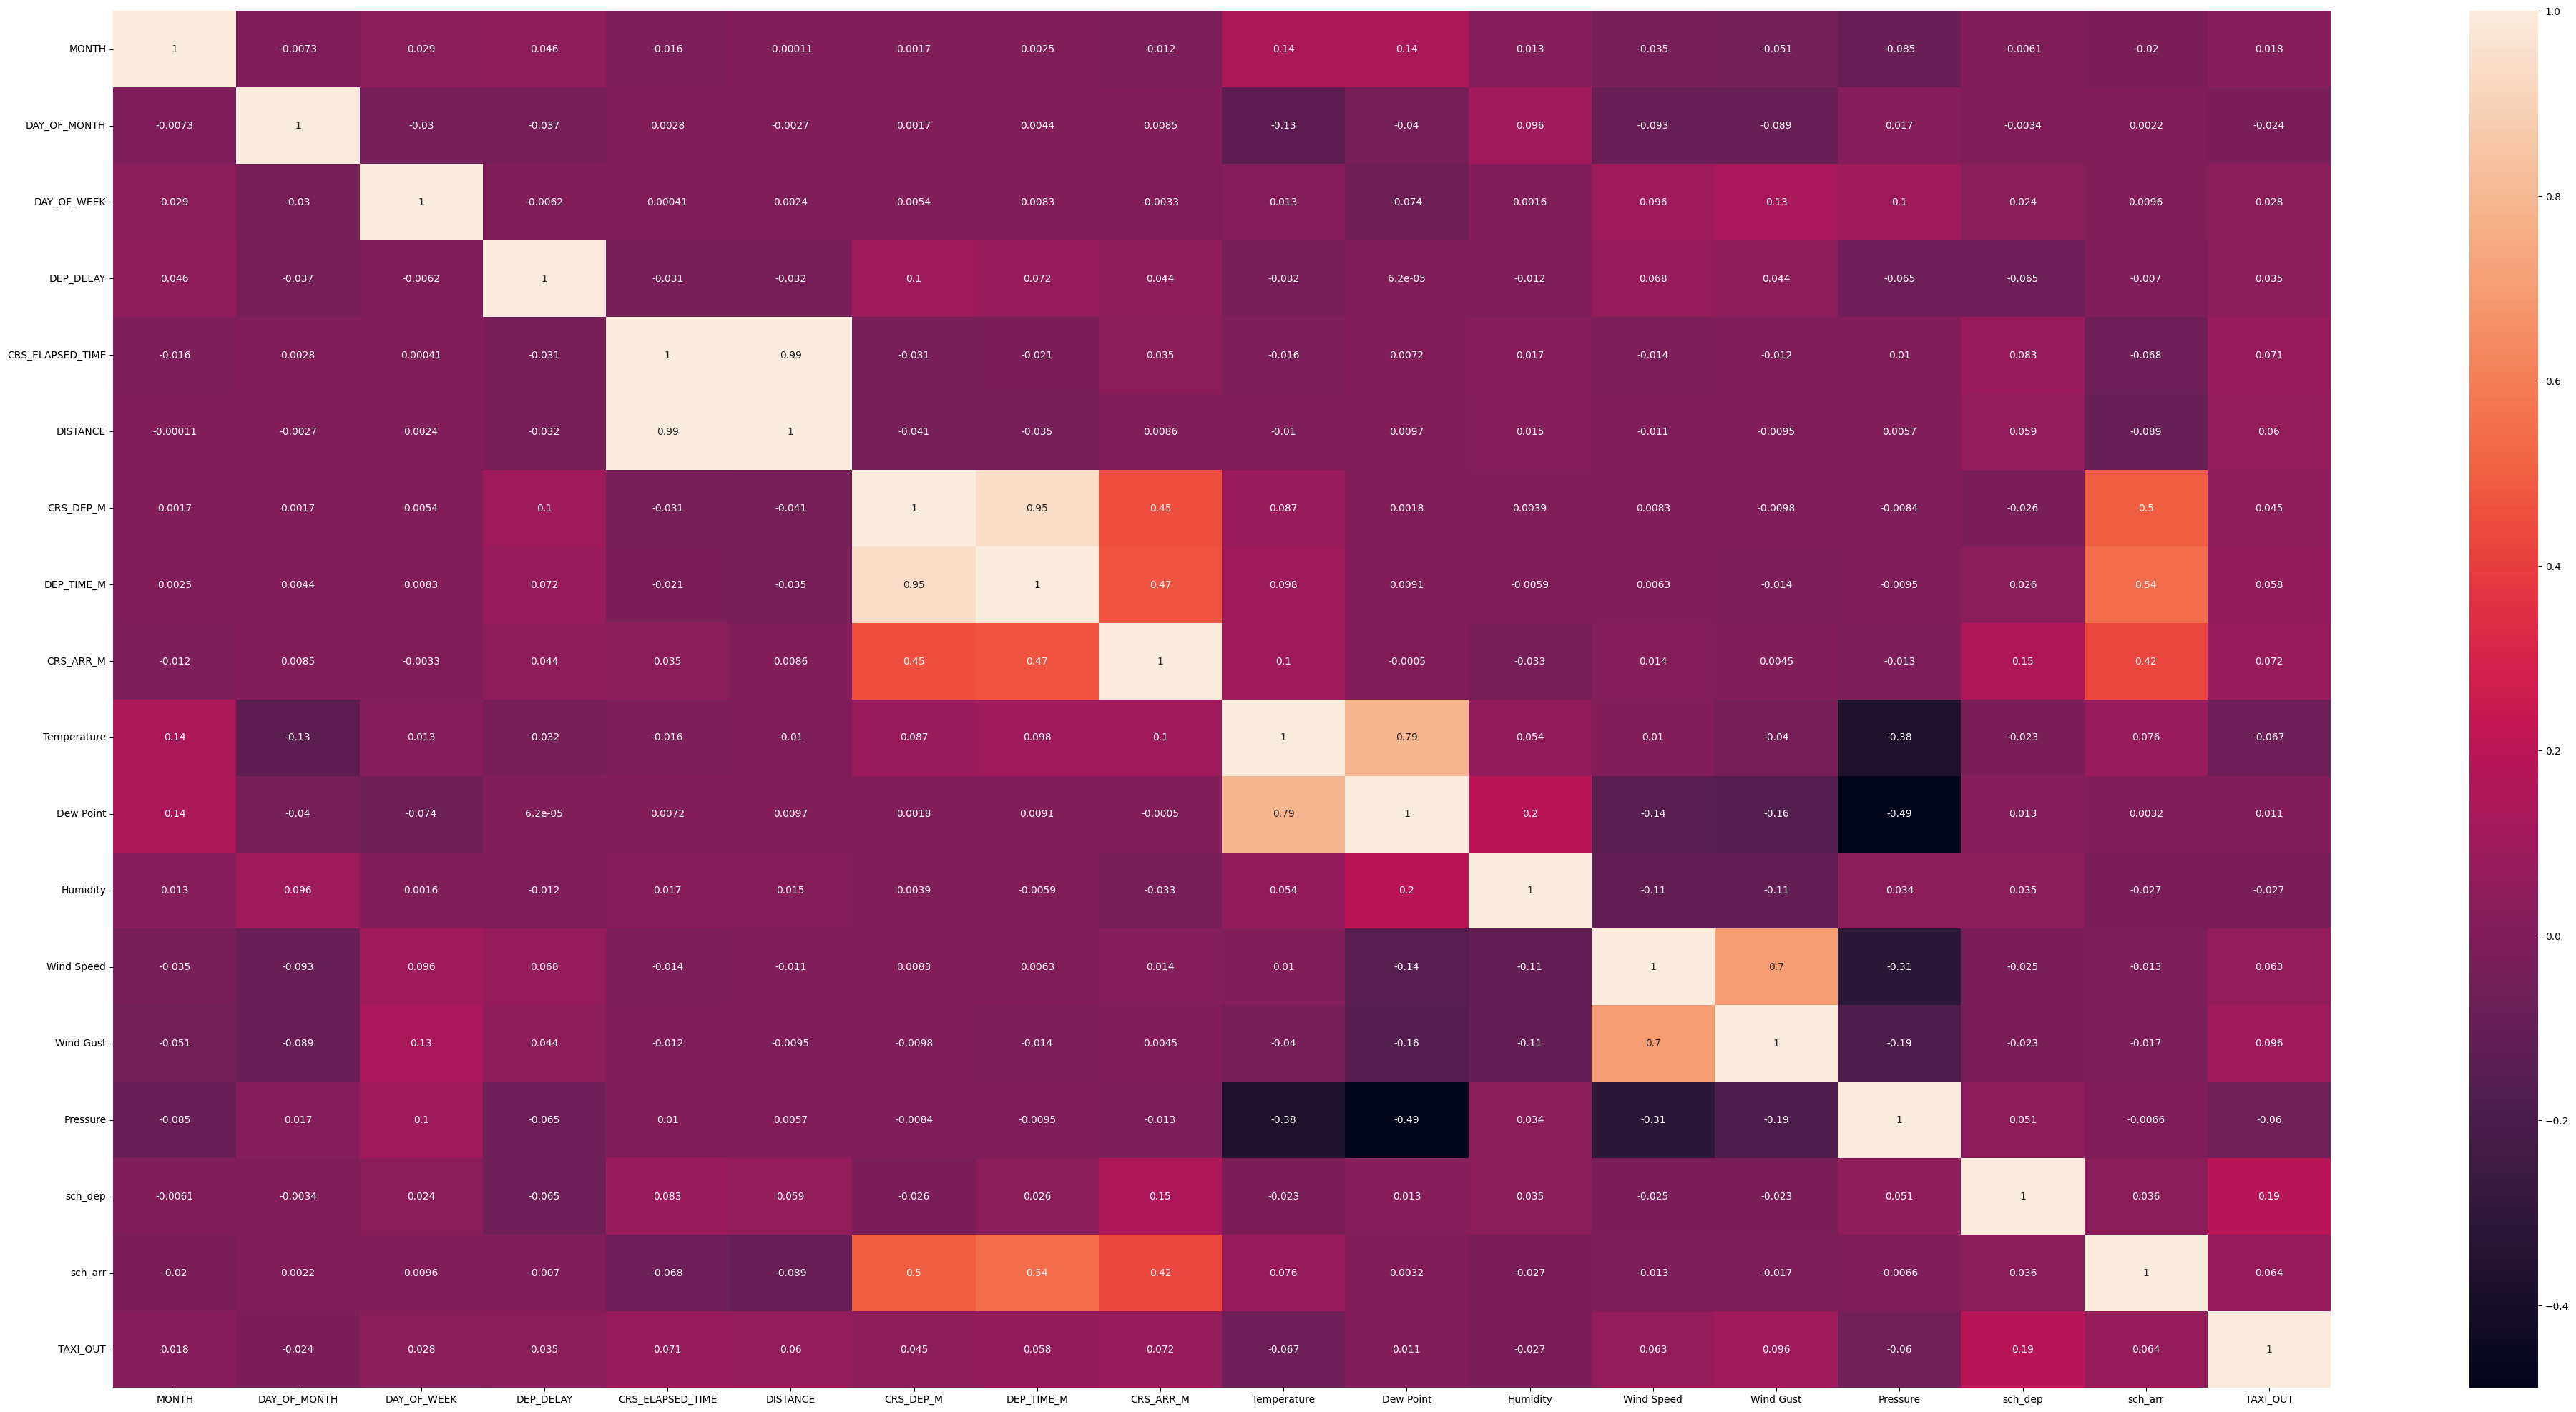

In [21]:
plt.figure(figsize=(50,25))
sns.heatmap(corr_matrix, annot=True)

In [32]:
# We should start building our models at this point so let's create our X and y

X = df.drop("TAXI_OUT" , axis = 1)
y = df["TAXI_OUT"]

# I'll now split the training and test set, and I'll go with 90% for training and 10% for testing
# hopefully this will be accurate enough

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [35]:
# Now we can test different models and what they come up with

# Linear Regression

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

act_pred = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})
act_pred

,Actual Value,Predicted Value
6857,23,22.516818
7131,15,20.011708
2733,13,20.083963
3886,18,17.238679
9028,22,20.460390
...,...,...
2093,13,20.850608
19373,27,19.968956
28543,15,22.770633
21008,18,20.427134
